# Course Project

### Group Name : Group 140
### Full Name : Milind Shailehskumar Parvatia 
### ID : S3806853
### Full Name : Ajaykumar Himmatbhai Kothiya
### ID : S3793661

# Source And Description of Dataset

The dataset here we have used for the case study is related to bank marketing.

*   The data is related to direct marketing campaigns of Portuguese banking institutions.Often, more than one contact to the same client was required, to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
*   Here the marketing campaigns are directly related to phone calls. This dataset has 17 attributes and 4521 instances. in which The descriptive features include 7 numeric and 9 nominal categorical features. The target feature has two classes defined as "yes" and "no" respectively.
*   Source of the dataset : [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014, Available at (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

# Objective 

Our goal is to predict whether a client will subscribe(yes/no) a term deposit, hence The target for this dataset is term deposit(variable y).

# Data Preparation

## Retriving Dataset

In [1]:
# Importing all the required libraries for the project

!pip install --upgrade altair
!pip install vega vega_datasets

import scipy
import warnings
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics, preprocessing
from IPython.core.interactiveshell import InteractiveShell
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split ,cross_val_score, RandomizedSearchCV

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity = "all"
alt.renderers.enable('html') # required in Jupyter notebooks

Requirement already up-to-date: altair in /usr/local/lib/python3.7/site-packages (4.1.0)
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


RendererRegistry.enable('html')

In [2]:
# Reading .csv file as df with sep=',' as argument to function

df = pd.read_csv('bank.csv', sep=',')

In [3]:
# Representing Head of dataframe

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Showing size of Dataframe

df.shape

(4521, 17)

In [5]:
# Listing all columns of Dataframes

df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [6]:
# Representing Dataframes datatypes

df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Handling Outliers and Missing Values

In [7]:
# Handling outlier's and removing rows if Z.score if > 3

for column in df:
    if df[column].dtypes == np.int64:
        df = df[(np.abs(stats.zscore(df[column])) < 3)]

In [8]:
# Representing null values of every columns

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Showing 5 randomly selected rows in this raw dataset

df.sample(n=5, random_state=0)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3728,53,technician,married,secondary,no,0,no,no,cellular,22,aug,77,9,-1,0,unknown,no
157,55,technician,married,secondary,no,273,yes,no,cellular,29,jan,84,3,183,3,failure,no
3616,45,management,single,tertiary,no,16,no,no,cellular,31,jul,59,2,-1,0,unknown,no
3003,33,management,single,tertiary,no,23,no,no,cellular,20,aug,216,3,-1,0,unknown,no
3257,31,admin.,single,secondary,no,1588,yes,no,unknown,3,jun,14,1,-1,0,unknown,no


## Summary statistics

In [10]:
# Showing summary statistics for the full data

df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,3954.000000,3954,3954,3954,3954,3954.000000,3954,3954,3954,3954.000000,3954,3954.000000,3954.000000,3954.000000,3954.000000,3954,3954
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,842,2454,2021,3882,NaN,2221,3325,2479,NaN,1191,NaN,NaN,NaN,NaN,3459,3564
mean,40.832828,NaN,NaN,NaN,NaN,1111.301467,NaN,NaN,NaN,15.987607,NaN,242.521750,2.507081,22.860900,0.251391,NaN,NaN
std,9.996059,NaN,NaN,NaN,NaN,1767.777687,NaN,NaN,NaN,8.299363,NaN,198.906138,2.007846,69.865944,0.758478,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,8.000000,NaN,105.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,415.000000,NaN,NaN,NaN,16.000000,NaN,183.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1371.500000,NaN,NaN,NaN,21.000000,NaN,317.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Encoding Target Feature

In [11]:
# Removing y column from datafrmae and naming as "target", The rest of the features are the descriptive features which we call "Data".

Data = df.drop(columns='y')
target = df['y']
target.value_counts()

no     3564
yes     390
Name: y, dtype: int64

In [12]:
# encode the target feature so that the 'no' is '0' and 'yes' is '1'.

target = target.replace({'no': 0, 'yes': 1})
target.value_counts()

0    3564
1     390
Name: y, dtype: int64

## Encoding Categorical Feature

In [13]:
# Extracting the list of categorical descriptive features which are required to encode
categorical_cols = Data.columns[Data.dtypes==object].tolist()

In [14]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

In [15]:
# Representing encoded data dataframe

Data.sample(5, random_state=999)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1152,50,0,0,0,0,4,86,4,-1,0,...,0,0,0,0,0,0,0,0,0,1
3873,50,0,3304,0,0,5,1009,2,-1,0,...,1,0,0,0,0,0,0,0,0,1
4399,29,0,452,1,0,27,347,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
975,34,0,215,0,0,3,350,3,-1,0,...,0,1,0,0,0,0,0,0,0,1
2816,34,0,586,1,0,16,489,2,-1,0,...,0,0,1,0,0,0,0,0,0,1


## Scaling feature

Scaling is mandatory for some important class of models such as nearest neighbors, SVMs, and deep learning.

Min-Max Scaling: Each descriptive feature is scaled to be between 0 and 1. Min-max scaling for a numerical feature is done as follows:

scaled_value=value - min_valuemax_value - min_value

In [16]:
# After encoding all the categorical features, we copy data df to keep track of column name and perform a min-max scaling of the descriptive features

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
# Representing encoded data dataframe

pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1014,0.584906,0.0,0.241984,0.0,0.0,0.100000,0.078846,0.272727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3385,0.584906,0.0,0.483310,0.0,0.0,0.133333,0.966346,0.090909,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3845,0.188679,0.0,0.274998,1.0,0.0,0.866667,0.329808,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
857,0.283019,0.0,0.257688,0.0,0.0,0.066667,0.332692,0.181818,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2484,0.283019,0.0,0.284786,1.0,0.0,0.500000,0.466346,0.090909,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection & Ranking

In [18]:
# Here we will determine top 10 best features using RandomForestClassifier to get ranking of features and gain some insight into the problem at hand. During the hyperparameter tuning phase, we will include RFI as part of the pipeline and we will search over 10, 20, and the full set of 48 features to determine which number of features works best with each classifier.

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

array(['duration', 'balance', 'day', 'age', 'poutcome_success',
       'campaign', 'pdays', 'month_oct', 'housing', 'previous'],
      dtype=object)

In [19]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.23860507, 0.09702131, 0.08782677, 0.08702176, 0.04173019,
       0.03954484, 0.0286028 , 0.02048133, 0.01960155, 0.01733279])

In [20]:
# plot_imp funtion is used to create plot using altir 

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [21]:
# we visualize features ranking 

plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

alt.Chart(...)

# Data Explorations

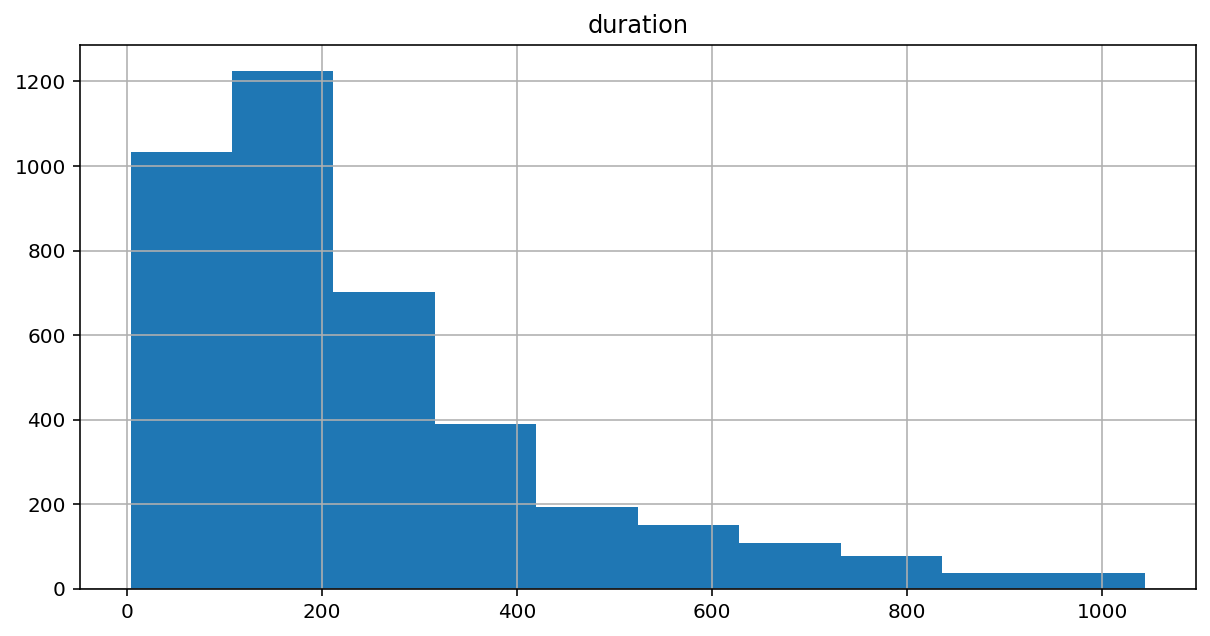

In [22]:
feature1 = ['duration']
df[feature1].hist(figsize=(10, 5));

From this histogram it is clear that the last contact duration is highest around between 100 to 200 seconds. After that it was keep on decreasing and almost lowest between 830 to 1000 seconds.
So the most of the phone calls were performed between 100 to 200 seconds.

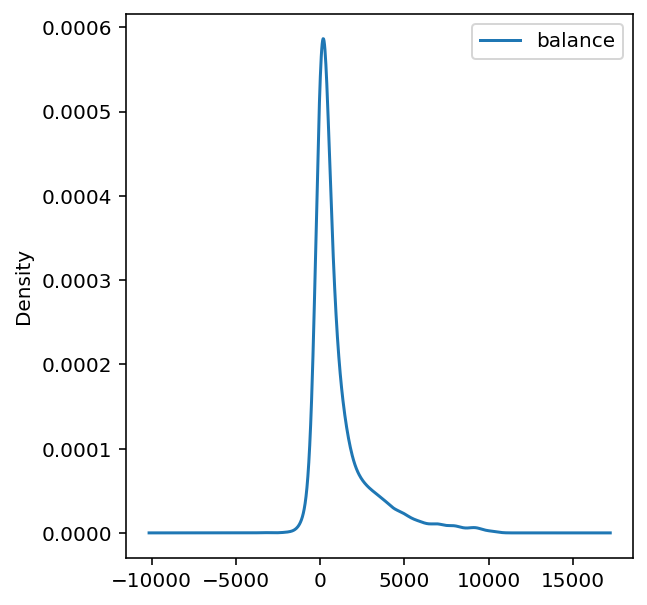

In [23]:
feature2 = ['balance']
df[feature2].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 5));

Here the most of clients has account balance between 0 to 2000.
Very less number of clients has account balance is less than 0.

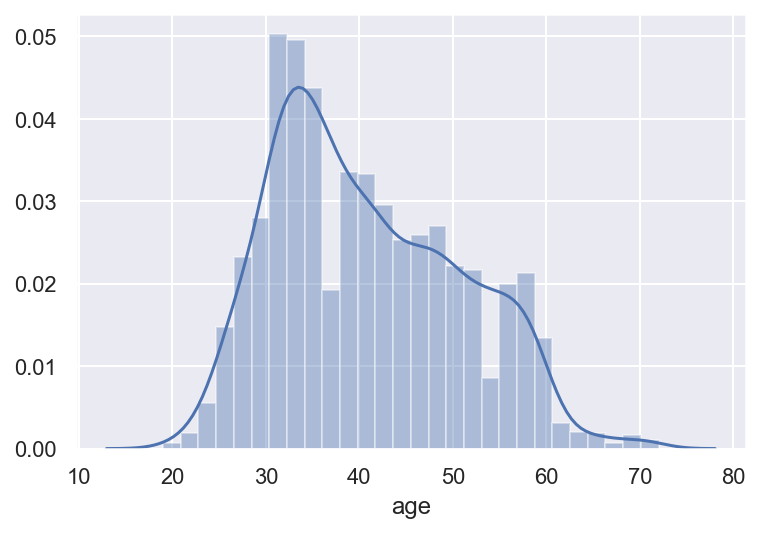

In [24]:
import seaborn as sns
sns.set()

sns.distplot(df['age']);

From the density graph it is clear that the bank has large number of clients aged between 30 to 40.
Moderate number of clients are aged between 40 to 60 are connected with the bank.

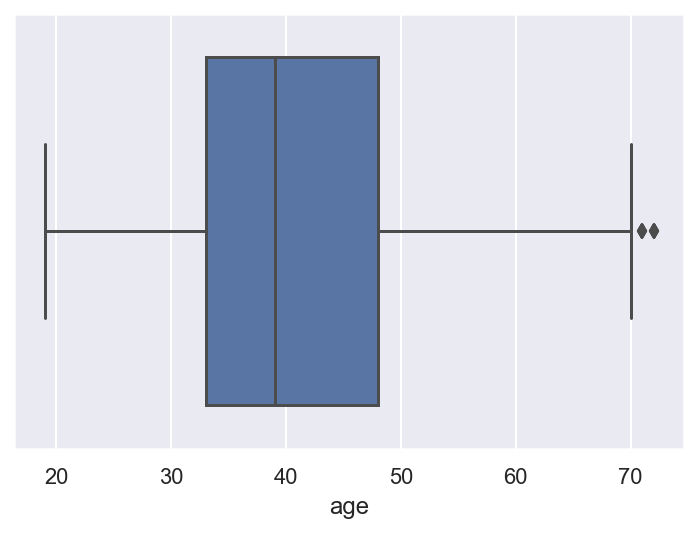

In [25]:
sns.boxplot(x='age', data=df);

The box plot represents that most of the clients are aged between 33 to 48.
The minimum age is 18 and the maximum age is 70.

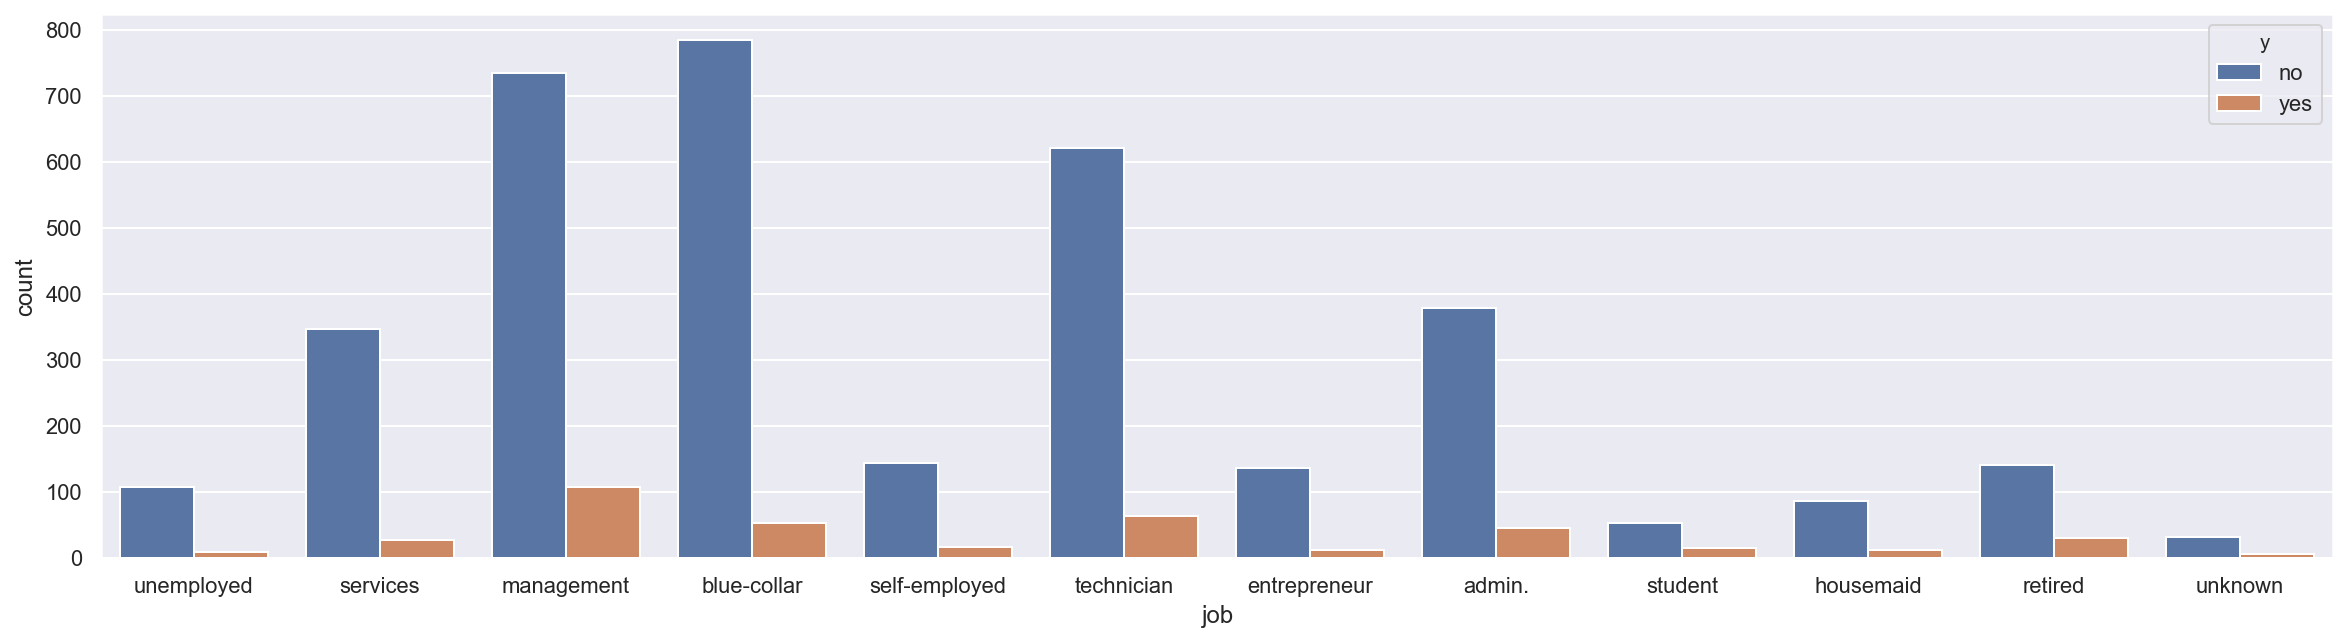

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x='job', hue='y', data=df);

The bar chart shows that most of the clients with blue-collar and management jobs are not subscribed with term deposits.Management employees are highly subscribed with term deposits. 

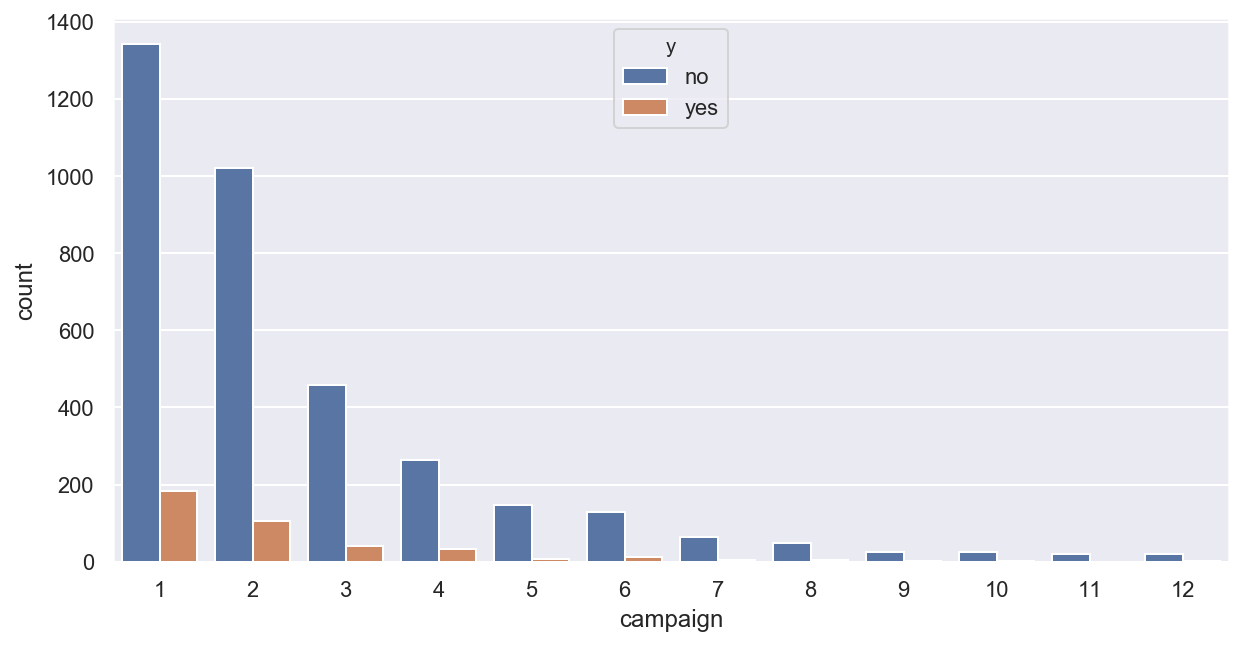

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='campaign', hue='y', data=df);

The bar chart shows that campaign 1 and campaign 2 is highly performed but they are almost failed to subscribe the term deposits. 

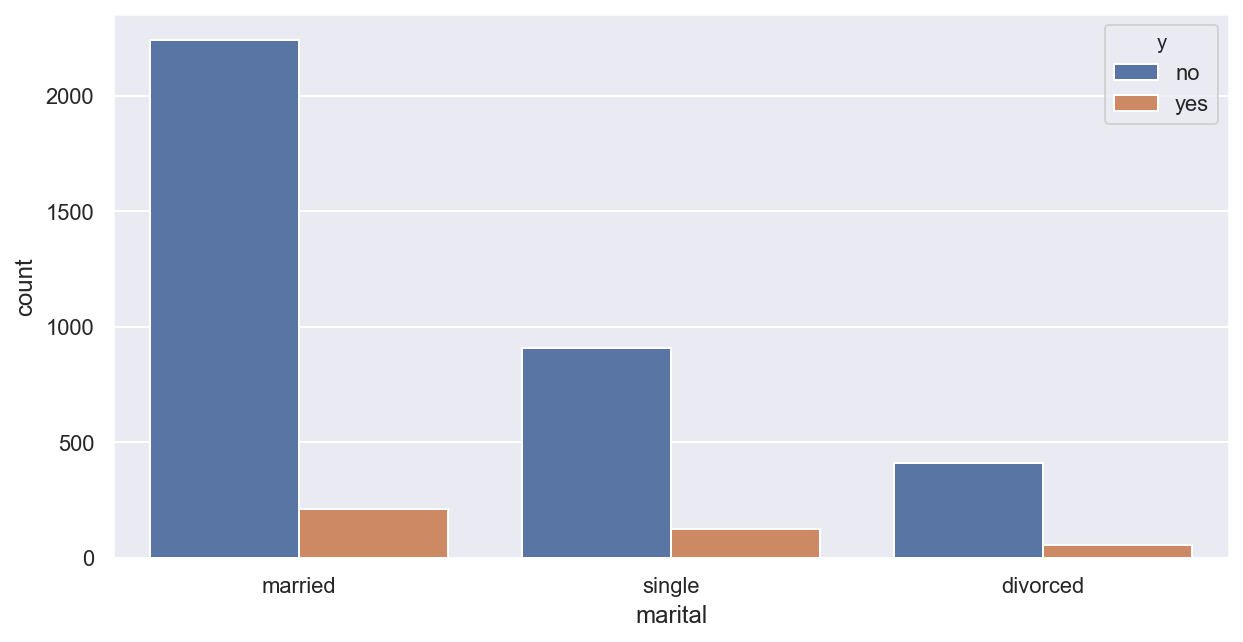

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df);

From the graph, it is clear that around 2300  married people do not believe to subscribe to the term deposit and around 250 married people believe to subscribe for term deposits. Very less number of people subscribed with term deposits.

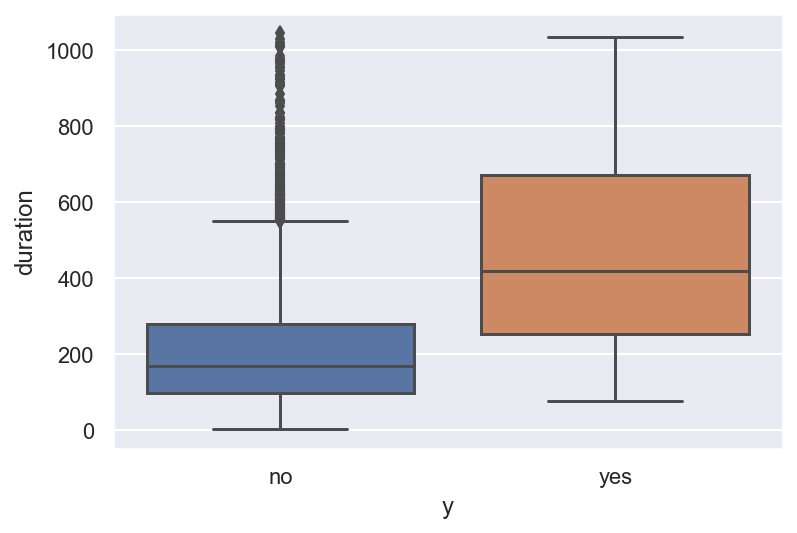

In [29]:
sns.boxplot(x='y', y='duration', data=df);

Most of contact duration were made between 100 to 300 seconds for clients who have not subscribed the term deposite.The clients who have subscribed for term deoosite are contacted mostly between 230 to 630 seconds.

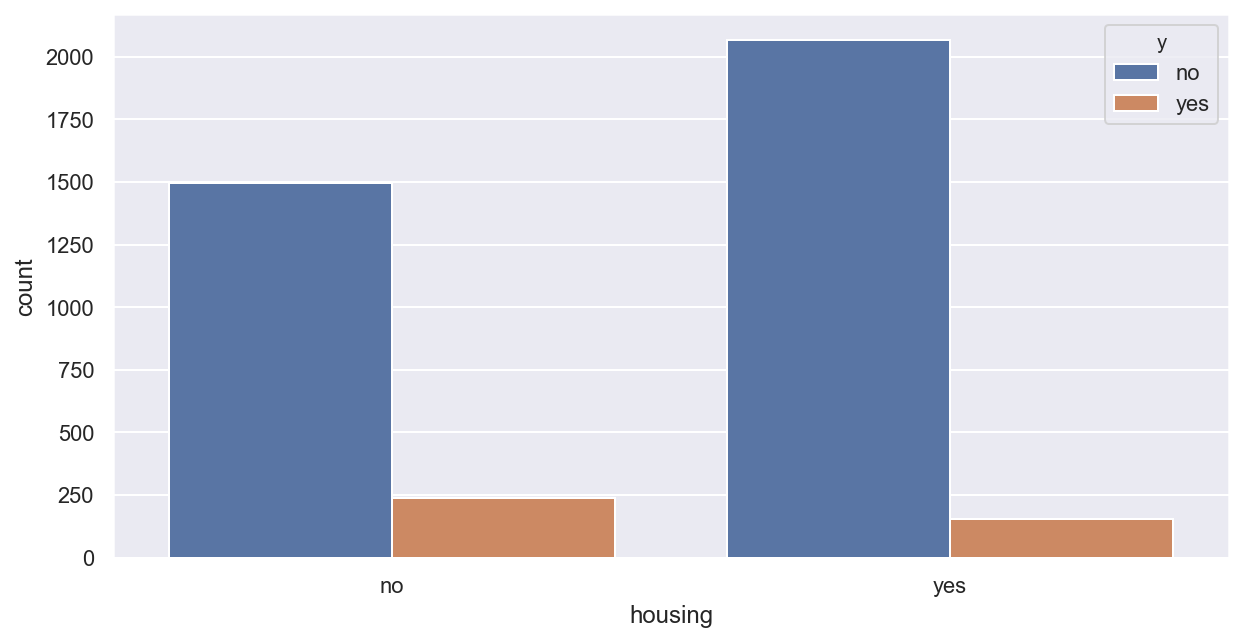

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='housing', hue='y', data=df);

Around 2100 clients have housing loans and they have subscribed for term deposits. 250 clients have subscribed for term deposits did not have housing loans.

<Figure size 1440x360 with 0 Axes>

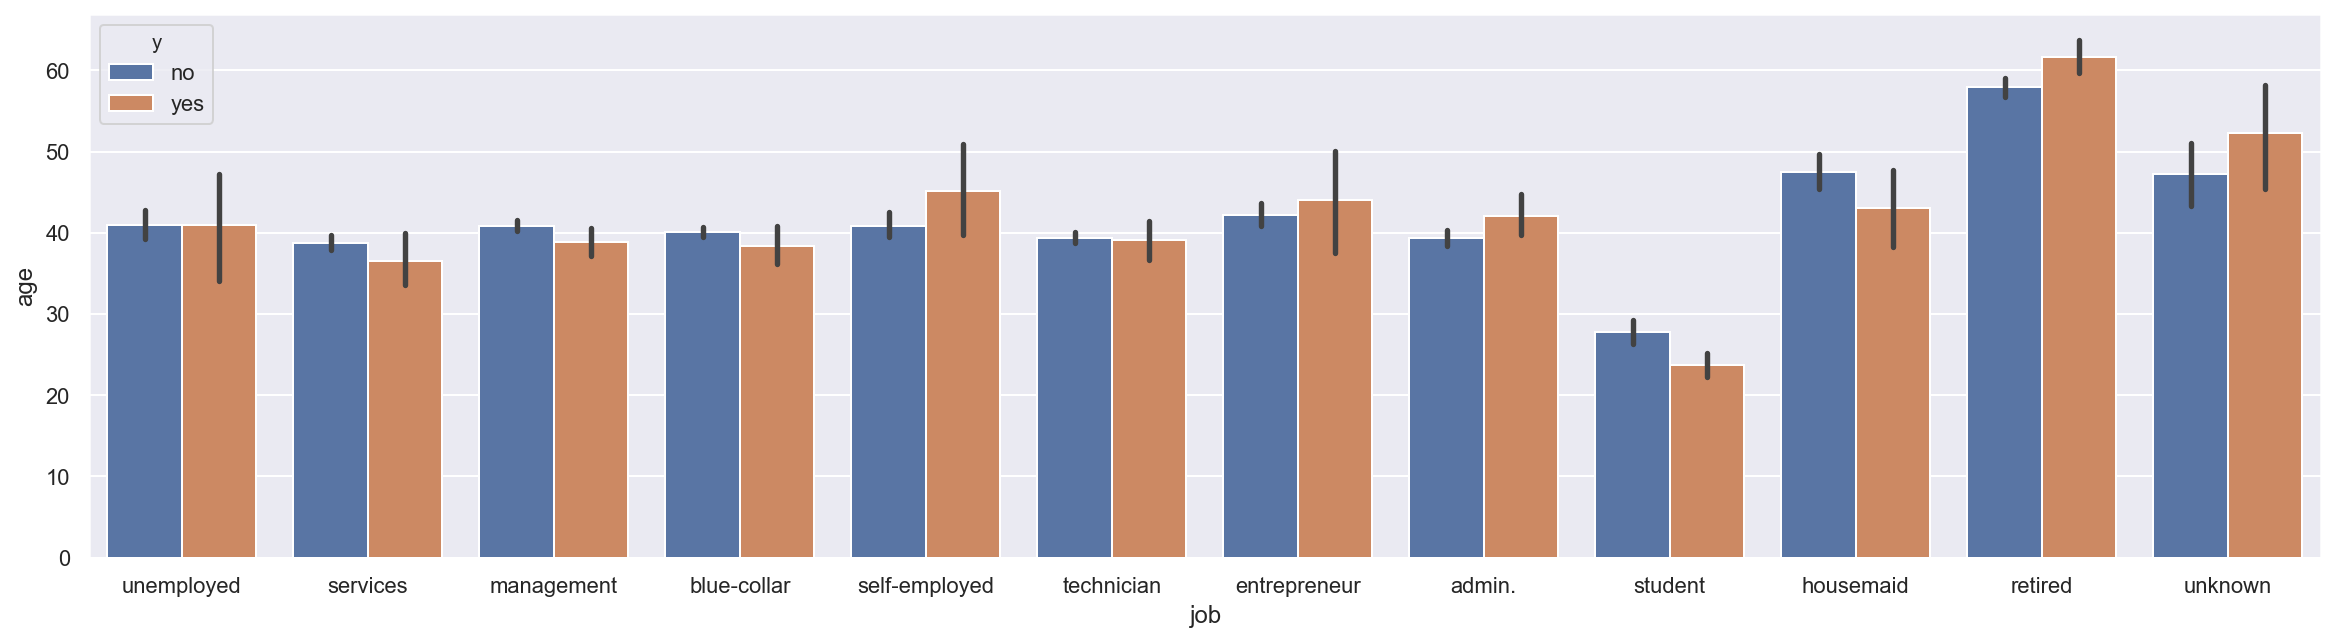

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x="job", y="age", hue="y", data=df)

From this bar-plot, it is clear that in both the cases of term deposits almost all the clients are aged between 40 to 50.

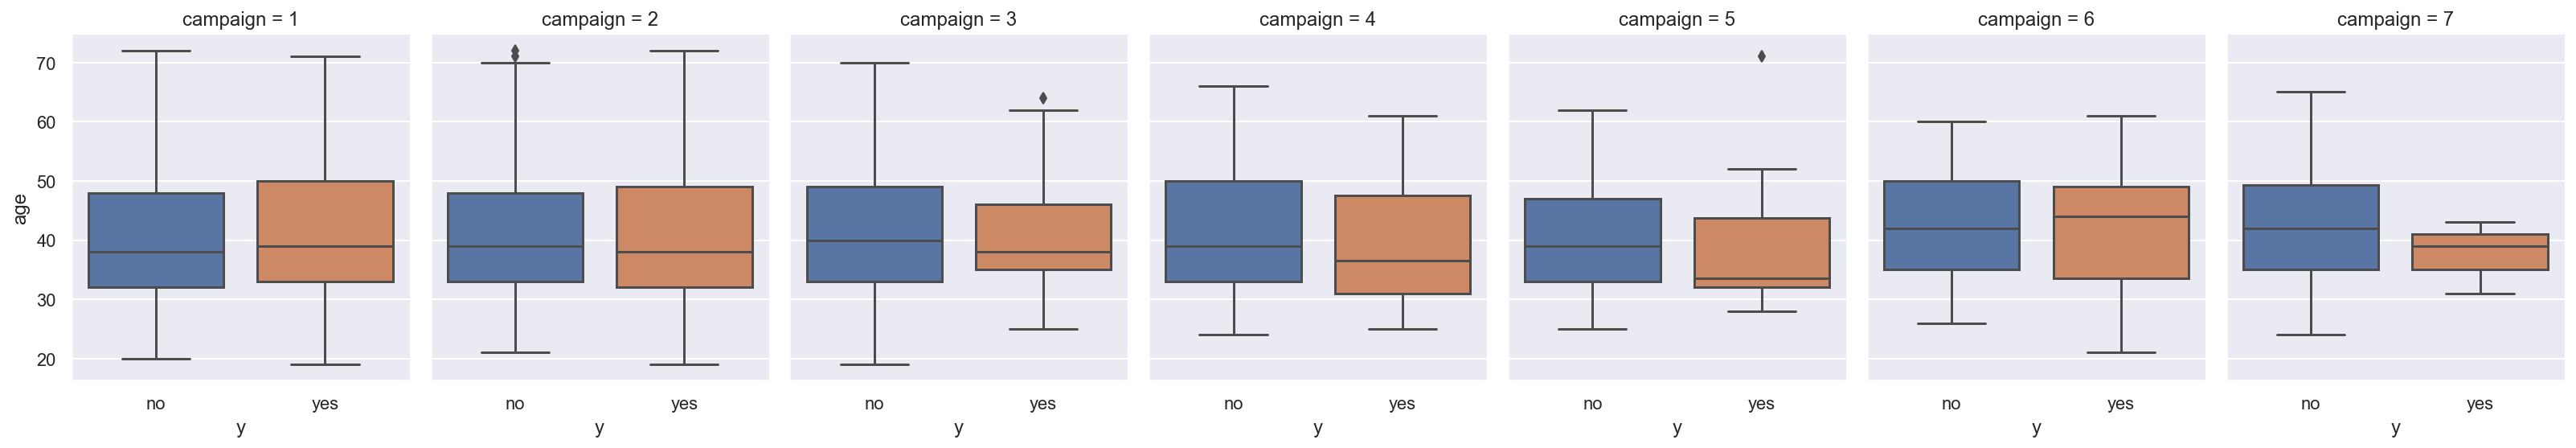

In [32]:
sns.catplot(x='y', y='age', col='campaign',
               data=df[df['campaign'] < 8], kind="box",
               col_wrap=7, height=4, aspect=.8);

Upper box plots shows that all the campaigns performed for clients who have not subscribed for term deposits are ages between 30 to 50. But in case of subscription of term deposits there is much variation in ages.

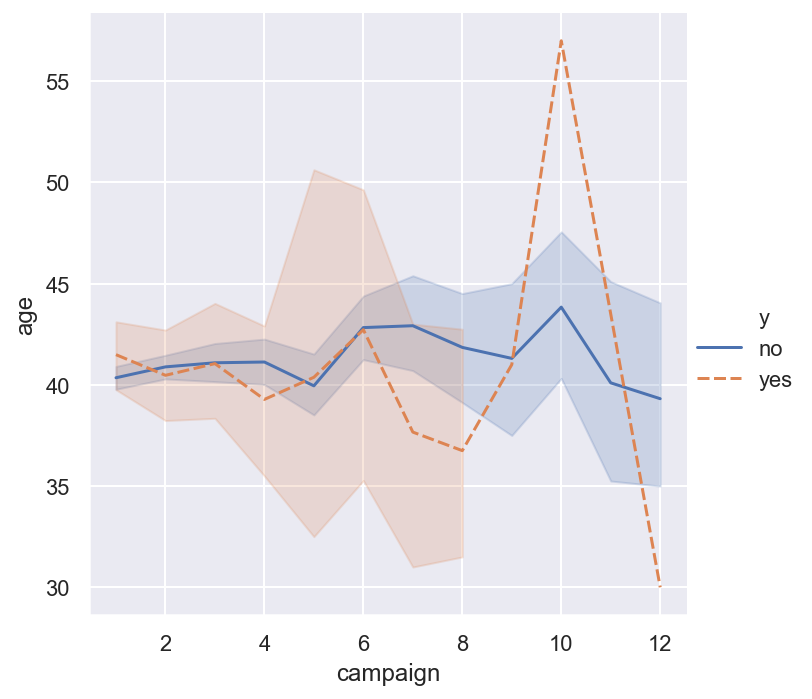

In [33]:
sns.relplot(x="campaign", y="age", hue="y", style="y",
            kind="line", data=df);

The line graphs for both cases of term deposits are almost similar up to campaign 8 and ages for them are also between 40 to 50. but for campaign 10 both lines are at peak in ages like for subscription of term deposits client is of age 57 and no subscription of term deposits client is of age 47.

# Predictive Modelling

## Methodology

We consider the following (binary) classifiers to predict the target feature:

1.   K-Nearest Neighbors (KNN)
2.   Decision trees (DT)
3.   Naive Bayes (NB)
4.   Support Vector Classification (SVC)

First we have cleaned the dataset. This transformation includes encoding categorical descriptive features as numerical and then scaling of the descriptive features. After that, We split into training and test sets with a ***70:30 ratio***. This way, our training data has **2767 rows** and test data has **1187 rows**. To be clear, our terminology here is that

> **The 2767 rows of data used during the hyperparameter tuning phase is called the training data.
> The 1187 rows of data used during the performance comparison phase is called the test data.**

Before fitting a particular classifier on the training data, we select the best features using the powerful Random Forest Importance method inside a pipeline. We consider **10, 20, and the full set of features (with 48 features)** after encoding of categorical features. Using feature selection together with hyperparameter search inside a single pipeline, we conduct a **5-fold stratified cross-validation** to fine-tune hyperparameters of each classifier using **area under curve (AUC)** as the performance metric. We build each model using parallel processing with **"-2" cores**. **We also examine sensitivity of each model with respect to its hyperparameters during the search.**

Classifiers with the best set of hyperparameter values as identified via grid search using the training data are called tuned classifiers. Once we identify the three tuned classifiers (with the best hyperparameter values), we **"fit" them on the test data using 10-fold cross-validation in a paired fashion and we perform paired t-tests** to see if any performance difference is statistically significant. In addition, **we compare the classifiers with respect to their recall scores and confusion matrices on the test data**.

## Train-Test Splitting

So, we will train and tune our models on 70% rows of training data and we will test them on 30% rows of test data.


In [34]:
# we will Split this dataset into train and test partitions with a 70:30 ratio using stratification.

# Renaming datasets
Data_sample = Data
target_sample = target

Data_sample_train, Data_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data_sample, target_sample, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target_sample)

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(2767, 48)
(1187, 48)


## Model Evaluation Strategy

For each model, we will use 5-fold stratified cross-validation evaluation method (without any repetitions for shorter run times) for hyperparameter tuning.

In [35]:
cv_method = StratifiedKFold(n_splits=5, random_state=999)

## Hyperparameter Tuning 


Hyper-parameters are parameters that are not directly learnt within estimators. In sci-kit-learn, they are passed as arguments to the constructor of the estimator classes. 

It is possible and recommended to search the hyper-parameter space for the best cross-validation score. so we will use the Random Forest Importance Feature Selector for that purpose.

Any parameter provided when constructing an estimator may be optimized in this manner.

### Random Forest Importance Feature Selector

For feature selection, we use the powerful Random Forest Importance (RFI) method with 100 estimators. We have made RFI feature selection as part of the pipeline. For this reason, we define the custom RFIFeatureSelector() class below to pass in RFI as a "step" to the pipeline.

In [36]:
# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

### Search Result function

This function will return pandas Dataframe of search outputs.

In [37]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

### K-Nearest Neighbors (KNN)

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user.

The -neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value  is highly data-dependent: in general a larger  suppresses the effects of noise, but makes the classification boundaries less distinct.

Here, using Pipeline, we stack feature selection and grid search for KNN hyperparameter tuning via cross-validation. We will use the same Pipeline methodology for NB and DT.

The KNN hyperparameters are as follows:

1.   number of neighbors (n_neighbors) and
2.   the distance metric p.

In [38]:
pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 
gs_pipe_KNN.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:   19.6s finished


In [39]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 20, 'knn__p': 2, 'rfi_fs__n_features_': 10}

In [40]:
gs_pipe_KNN.best_score_

0.7989150106630851

We observe that the optimal KNN model has a mean AUC score of 0.813. The best performing KNN selected 10 features with 20 nearest neighbors and  𝑝=1 , which is the Manhattan distance.

In [41]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
27,0.798915,0.055689,0.870395,0.704399,20.0,2.0,10.0
24,0.798487,0.048065,0.858499,0.715845,20.0,1.0,10.0
21,0.797960,0.043572,0.856039,0.724480,15.0,2.0,10.0
18,0.796253,0.049575,0.854473,0.707503,15.0,1.0,10.0
15,0.788124,0.049093,0.833522,0.694195,10.0,2.0,10.0


In [42]:
#visualize the results of the grid search corresponding to 10 selected features.

results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

### Decision Trees (DT)



Decision Trees (DTs) are a non-parametric supervised learningDecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples: method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Here, we build a DT using gini index to maximize information gain. We aim to determine the optimal combinations of maximum depth (max_depth) and minimum sample split (min_samples_split).


In [43]:
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:   10.4s finished


In [44]:
gs_pipe_DT.best_params_

{'dt__max_depth': 4, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 10}

In [45]:
gs_pipe_DT.best_score_

0.770907767423208

Here, we observe that the optimal DT model has a mean AUC score of 0.778. The best performing DT selected 48 features with samples splits 5 and  max depth of 4.

In [46]:
#visualize the results of the grid search corresponding to 10 selected features.

results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

### (Gaussian) Naive Bayes (NB)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. We optimize var_smoothing (a variant of Laplace smoothing) as we do not have any prior information about our dataset. By default, the var_smoothing parameter's value is  10^−9  . We conduct the grid search in the logspace (over the powers of 10) sourced from NumPy. We start with 10 and end with  10^-3  with 200 different values, but we perform a random search over only 20 different values (for shorter run times). Since NB requires each descriptive feature to follow a Gaussian distribution, we first perform a power transformation on the input data before model fitting.

In [47]:
Data_sample_train_transformed = PowerTransformer().fit_transform(Data_sample_train)

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed, target_sample_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:   11.0s finished


In [48]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 10, 'nb__var_smoothing': 5.231099308056262}

In [49]:
gs_pipe_NB.best_score_

0.8370825477168283

Here, the optimal NB model has a mean AUC score of 0.847. The best performing NB selected 10 features with variable smoothing of 3.612.

In [50]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
2,0.837083,0.037431,0.878849,0.787623,10.0,5.231099
0,0.826501,0.029104,0.856203,0.785089,10.0,0.123155
8,0.826139,0.025448,0.855377,0.784495,10.0,0.077526
19,0.820839,0.029061,0.867426,0.783938,10.0,0.026738
18,0.816080,0.015894,0.832119,0.787976,20.0,0.748810


In [51]:
#visualize the results of the grid search corresponding to 10 selected features.

results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

### Support Vector Classification

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

As other classifiers, SVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples):

Hyper-parameters of Support Vector Classifier are includes C, kernel and gamma.

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

Here we will use Hyper-parameters as following, C = [0.1, 1, 10], gamma = [0.001, 0.0001], kernel = ['rbf'] and class weight =['balanced', None].

In [52]:
pipe_SVC = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('svc', SVC(random_state=0))])

params_pipe_SVC = {
                  'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'svc__C': [0.1, 1, 10], 
                   'svc__gamma': [0.001, 0.0001], 
                   'svc__kernel': ['rbf'],
                  'svc__class_weight':['balanced', None]
                  }

gs_pipe_SVC = GridSearchCV(estimator=pipe_SVC, 
                          param_grid=params_pipe_SVC, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_SVC.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-2)]: Done 180 out of 180 | elapsed:   23.0s finished


In [53]:
results_svc = get_search_results(gs_pipe_SVC)
results_svc.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svc__C,svc__class_weight,svc__gamma,svc__kernel
32,0.882098,0.0197173,0.916378,0.856042,48,10,balanced,0.001,rbf
35,0.870852,0.031013,0.894371,0.809821,48,10,None,0.0001,rbf
34,0.869143,0.0279777,0.901111,0.819095,48,10,None,0.001,rbf
20,0.867886,0.0210874,0.906249,0.846258,20,10,balanced,0.001,rbf
30,0.867672,0.0266754,0.886464,0.81475,48,1,None,0.001,rbf


In [54]:
gs_pipe_SVC.best_params_

{'rfi_fs__n_features_': 48,
 'svc__C': 10,
 'svc__class_weight': 'balanced',
 'svc__gamma': 0.001,
 'svc__kernel': 'rbf'}

In [55]:
gs_pipe_SVC.best_score_

0.8820975885485627

Here, the optimal SVC model has a mean AUC score of 0.882. The best performing SVC selected 48 features with C value of 10, balanced class weight, gamma is 0.001 and rbf as kernal.

In [56]:
#visualize the results of the grid search corresponding to 10 selected features.

results_SVC = get_search_results(gs_pipe_SVC)

results_SVC_10_features = results_SVC[results_SVC['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_SVC_10_features, 
          title='SVC Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('svc__C', title='C Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

# Performance Tuning

Here we get maximum accuracy from SVC model but we can see that maximum values lies in extreme end of its search space. Thus, we need to go beyond what we already tried to make sure that we are not missing out on even better values. For this reason, we try a new search as below.

In [57]:
pipe_SVC2 = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('svc', SVC(random_state=0))])

params_pipe_SVC2 = {
                  'rfi_fs__n_features_': [10],
                  'svc__C': [0.1, 1, 10, 100, 1000], 
                   'svc__gamma': [0.1, 0.01, 0.001], 
                   'svc__kernel': ['rbf'],
                  'svc__class_weight':['balanced', None]
                  }

gs_pipe_SVC2 = GridSearchCV(estimator=pipe_SVC2, 
                          param_grid=params_pipe_SVC2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_SVC2.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:   14.2s finished


In [58]:
gs_pipe_SVC2.best_params_

{'rfi_fs__n_features_': 10,
 'svc__C': 1000,
 'svc__class_weight': 'balanced',
 'svc__gamma': 0.01,
 'svc__kernel': 'rbf'}

In [59]:
gs_pipe_SVC2.best_score_

0.8583028049527313

Here, using new parameters on fix 10 features has decreased our accuracy of SVC from 0.882 to 0.859, which means working with 10 features is not preferable and we required more features to working with.

In [60]:
results_svc2 = get_search_results(gs_pipe_SVC2)
results_svc2.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svc__C,svc__class_weight,svc__gamma,svc__kernel
25,0.858303,0.0367033,0.906868,0.807923,10,1000,balanced,0.01,rbf
19,0.857146,0.0290556,0.901949,0.824498,10,100,balanced,0.01,rbf
6,0.856564,0.0336213,0.902532,0.808872,10,1,balanced,0.1,rbf
13,0.856053,0.0318728,0.900783,0.812267,10,10,balanced,0.01,rbf
26,0.855715,0.0335983,0.900601,0.814494,10,1000,balanced,0.001,rbf


We again observe that the cross-validated AUC score difference between the hyperparameter combinations is less than original value in this case. A visualization of the new search results is shown below.

In [61]:
#visualize the results of the grid search corresponding to 10 selected features.

results_SVC2 = get_search_results(gs_pipe_SVC2)

results_SVC2_10_features = results_SVC2[results_SVC2['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_SVC2_10_features, 
          title='SVC Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('svc__C', title='C Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

**Due to receiving low accuracy, we will again perform performance tuning with all available features to see if we can get more accuracy than before.**

In [62]:
pipe_SVC3 = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('svc', SVC(random_state=0))])

params_pipe_SVC3 = {
                  'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'svc__C': [0.1, 1, 10, 100, 1000], 
                   'svc__gamma': [0.1, 0.01, 0.001], 
                   'svc__kernel': ['rbf'],
                  'svc__class_weight':['balanced', None]
                  }

gs_pipe_SVC3 = GridSearchCV(estimator=pipe_SVC3, 
                          param_grid=params_pipe_SVC3, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_SVC3.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed:   46.5s finished


In [63]:
gs_pipe_SVC3.best_params_

{'rfi_fs__n_features_': 48,
 'svc__C': 1,
 'svc__class_weight': 'balanced',
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf'}

In [64]:
gs_pipe_SVC3.best_score_

0.8908302443189084

As suspected, we can achieve slightly better results with the new search space from 0.882 to 0.890 if we provides more features than 10, 48 in this case.

In [65]:
results_svc3 = get_search_results(gs_pipe_SVC3)
results_svc3.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svc__C,svc__class_weight,svc__gamma,svc__kernel
66,0.89083,0.0250444,0.925815,0.852099,48,1,balanced,0.1,rbf
73,0.889806,0.0230177,0.926435,0.858123,48,10,balanced,0.01,rbf
86,0.887143,0.0228606,0.919876,0.856736,48,1000,balanced,0.001,rbf
80,0.886034,0.0232604,0.924868,0.856627,48,100,balanced,0.001,rbf
74,0.882098,0.0197173,0.916378,0.856042,48,10,balanced,0.001,rbf


We again observe that the cross-validated AUC score difference between the hyperparameter combinations is bit high. A visualization of the new search results is shown below.

In [66]:
#visualize the results of the grid search corresponding to 10 selected features.

results_SVC3 = get_search_results(gs_pipe_SVC3)

results_SVC3_48_features = results_SVC3[results_SVC3['rfi_fs__n_features_'] == 48.0]

alt.Chart(results_SVC3_48_features, 
          title='SVC Performance Comparison with 48 Features'
         ).mark_line(point=True).encode(
    alt.X('svc__C', title='C Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

# Performance Comparison

## Paired t-tests of algorithms

In [67]:
paired_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=paired_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8081881903143586

In [68]:
Data_sample_test_transformed = PowerTransformer().fit_transform(Data_sample_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=target_sample_test, 
                                cv=paired_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.8280232228830359

In [69]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=paired_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7521700651373548

In [70]:
cv_results_SVC = cross_val_score(estimator=gs_pipe_SVC3.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=paired_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_SVC.mean()

0.8751486830926083

In [71]:
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_SVC))
print(stats.ttest_rel(cv_results_SVC, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_SVC))

Ttest_relResult(statistic=-0.8658134909073967, pvalue=0.4090790408688125)
Ttest_relResult(statistic=-1.8605322694456752, pvalue=0.09573219382654082)
Ttest_relResult(statistic=-4.065554560850547, pvalue=0.0028183673678008675)
Ttest_relResult(statistic=-5.630188238605263, pvalue=0.0003216212572766953)
Ttest_relResult(statistic=2.5969768318369204, pvalue=0.02888107630049683)
Ttest_relResult(statistic=-2.413876013864483, pvalue=0.03900034621390506)


In [72]:
predicted_KNN = gs_pipe_KNN.predict(Data_sample_test)

In [73]:
Data_test_transformed = PowerTransformer().fit_transform(Data_sample_test)
predicted_NB = gs_pipe_NB.predict(Data_test_transformed)

In [74]:
predicted_DT = gs_pipe_DT.predict(Data_sample_test)

In [75]:
predicted_SVC = gs_pipe_SVC3.predict(Data_sample_test)

In [76]:
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_sample_test, predicted_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_sample_test, predicted_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_sample_test, predicted_DT))
print("\nClassification report for SVC") 
print(metrics.classification_report(target_sample_test, predicted_SVC))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1070
           1       0.70      0.16      0.26       117

    accuracy                           0.91      1187
   macro avg       0.81      0.58      0.61      1187
weighted avg       0.89      0.91      0.88      1187


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1070
           1       0.64      0.08      0.14       117

    accuracy                           0.90      1187
   macro avg       0.78      0.54      0.54      1187
weighted avg       0.88      0.90      0.87      1187


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1070
           1       0.66      0.28      0.40       117

    accuracy                           0.91      1187
  

In [77]:
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_sample_test, predicted_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_sample_test, predicted_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_sample_test, predicted_DT))
print("\nConfusion matrix for SVC") 
print(metrics.confusion_matrix(target_sample_test, predicted_SVC))


Confusion matrix for K-Nearest Neighbor
[[1062    8]
 [  98   19]]

Confusion matrix for Naive Bayes
[[1065    5]
 [ 108    9]]

Confusion matrix for Decision Tree
[[1053   17]
 [  84   33]]

Confusion matrix for SVC
[[916 154]
 [ 23  94]]


From the above statistics, we can say that Support Vector Classification provides the highest value if we calculate recall as the performance metric, which is equivalent to the true positive rate (TPR). So in this context, SVC would be the best performer since it produces the highest recall score.

# Limitations

*  First, we utilized a blanket power transformation on the training data when building the NB, ignoring the dummy features within the dataset. This might partially explain the poor performance of the NB when evaluated on the test set. A potential solution is to build a Gaussian NB and a Bernoulli NB separately on the numerical and dummy descriptive features respectively. Then we can compute a final prediction by multiplying predictions from each model since NB assumes inter-independence conditioned on the value of the target feature.
*  The SVC classifier statistically outperforms the other three models. Therefore, we can perhaps improve it by further expanding the hyperparameter search space by including other parameters of this classification method. 
*  Furthermore, we can consider random forests and other ensemble methods built on trees as potentially better models.
*  Our modeling strategy has a few flaws and limitations. First, ours was a black-box approach since we preferred raw predictive performance over interpretability. In the future, we could consider a more in-depth analysis about the feature selection & ranking process as well as our choices for the hyperparameter spaces.



# Summary

> The Support Vector Classification provides the highest cross-validated AUC score on the training data, with 48 instead of 10 of the best features selected by Random Forest Importance (RFI).

> Also, when evaluated on the test data (in a cross-validated fashion), the Support Vector Classification model again outperforms all Decision Tree, Naive Bayes and k-Nearest Neighbor models with respect to AUC.

> It also yields the highest recall score on the test data. 

> We also observe that our SVC model is very sensitive to the number of features as selected by RFI when conditioned on the values of the hyperparameters in general.

> For this reason, it seems working with 10 features is not preferable instead of working with the full feature set, beacuse of udermining dataset; rather than this, for this case working with 48 features is more suitable.

# References

 [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014, Available at (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Case Study: Predicting Income Status, https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#Discussion

pandas documentation, https://pandas.pydata.org/pandas-docs/stable/index.html

 scikit-learn: Supervised learning, https://scikit-learn.org/stable/user_guide.html

stackoverflow, https://stackoverflow.com/